In [2]:
import pandas as pd
import numpy as np

df_all_rpv = pd.read_csv("/run/media/mak/Heim/RPV_Results/V12/rpv_results.csv")


df_all_rpv = df_all_rpv[df_all_rpv["status"] == "success"]


grouped = df_all_rpv.drop(["processed_at", "status", "cultivar"],axis=1).groupby(by=["week", "band","treatment"]).mean().reset_index()

grouped["treatment"] = grouped["treatment"].map({"no_trt": 0, "trt": 1}).astype("int64")

grouped = grouped.drop(["rc","plot_id","Unnamed: 0"],axis=1)
grouped

FileNotFoundError: [Errno 2] No such file or directory: '/run/media/mak/Heim/RPV_Results/V12/rpv_results.csv'

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume 'grouped' DataFrame is already created as per your script ---
# It has columns: ['week', 'band', 'treatment', 'index', 'rho0', 'k', 'theta', 'rmse', 'nrmse']
# and 'treatment' is mapped to 0 (no_trt) and 1 (trt).
# -------------------------------------------------------------------------


# --- Data Preparation ---
# Create a new DataFrame that averages the treatment values for the simplified plots
grouped_avg = grouped.groupby(['week', 'band',"treatment"]).mean().reset_index()

# Define parameters and order weeks for consistent plotting
parameters_to_plot = ['rho0', 'k', 'theta','nrmse']
week_order = sorted(grouped['week'].unique(), key=lambda w: int(w.replace('week', '')))
grouped['week'] = pd.Categorical(grouped['week'], categories=week_order, ordered=True)
grouped_avg['week'] = pd.Categorical(grouped_avg['week'], categories=week_order, ordered=True)
grouped_avg

,week,band,treatment,index,rho0,k,theta,rmse,nrmse
0,week0,band1,0,17.5,0.046985,1.050635,-0.080772,0.024478,0.432051
1,week0,band1,1,5.5,0.046266,0.794130,-0.118221,0.023290,0.424198
2,week0,band2,0,17.5,0.087522,1.033463,-0.083663,0.035282,0.332542
3,week0,band2,1,5.5,0.082770,0.730497,-0.135624,0.033989,0.338329
4,week0,band3,0,17.5,0.087281,1.076837,-0.088241,0.054618,0.511724
5,week0,band3,1,5.5,0.085972,0.768121,-0.134747,0.052078,0.498211
6,week0,band4,0,17.5,0.163065,1.011670,-0.077681,0.064602,0.331680
7,week0,band4,1,5.5,0.151577,0.656678,-0.144164,0.063150,0.340747
8,week0,band5,0,17.5,0.262648,1.010325,-0.068295,0.124781,0.405177
9,week0,band5,1,5.5,0.237287,0.715607,-0.126583,0.121280,0.425223


Generating simplified parameter evolution plots (one band per subplot, fixed band colors)...


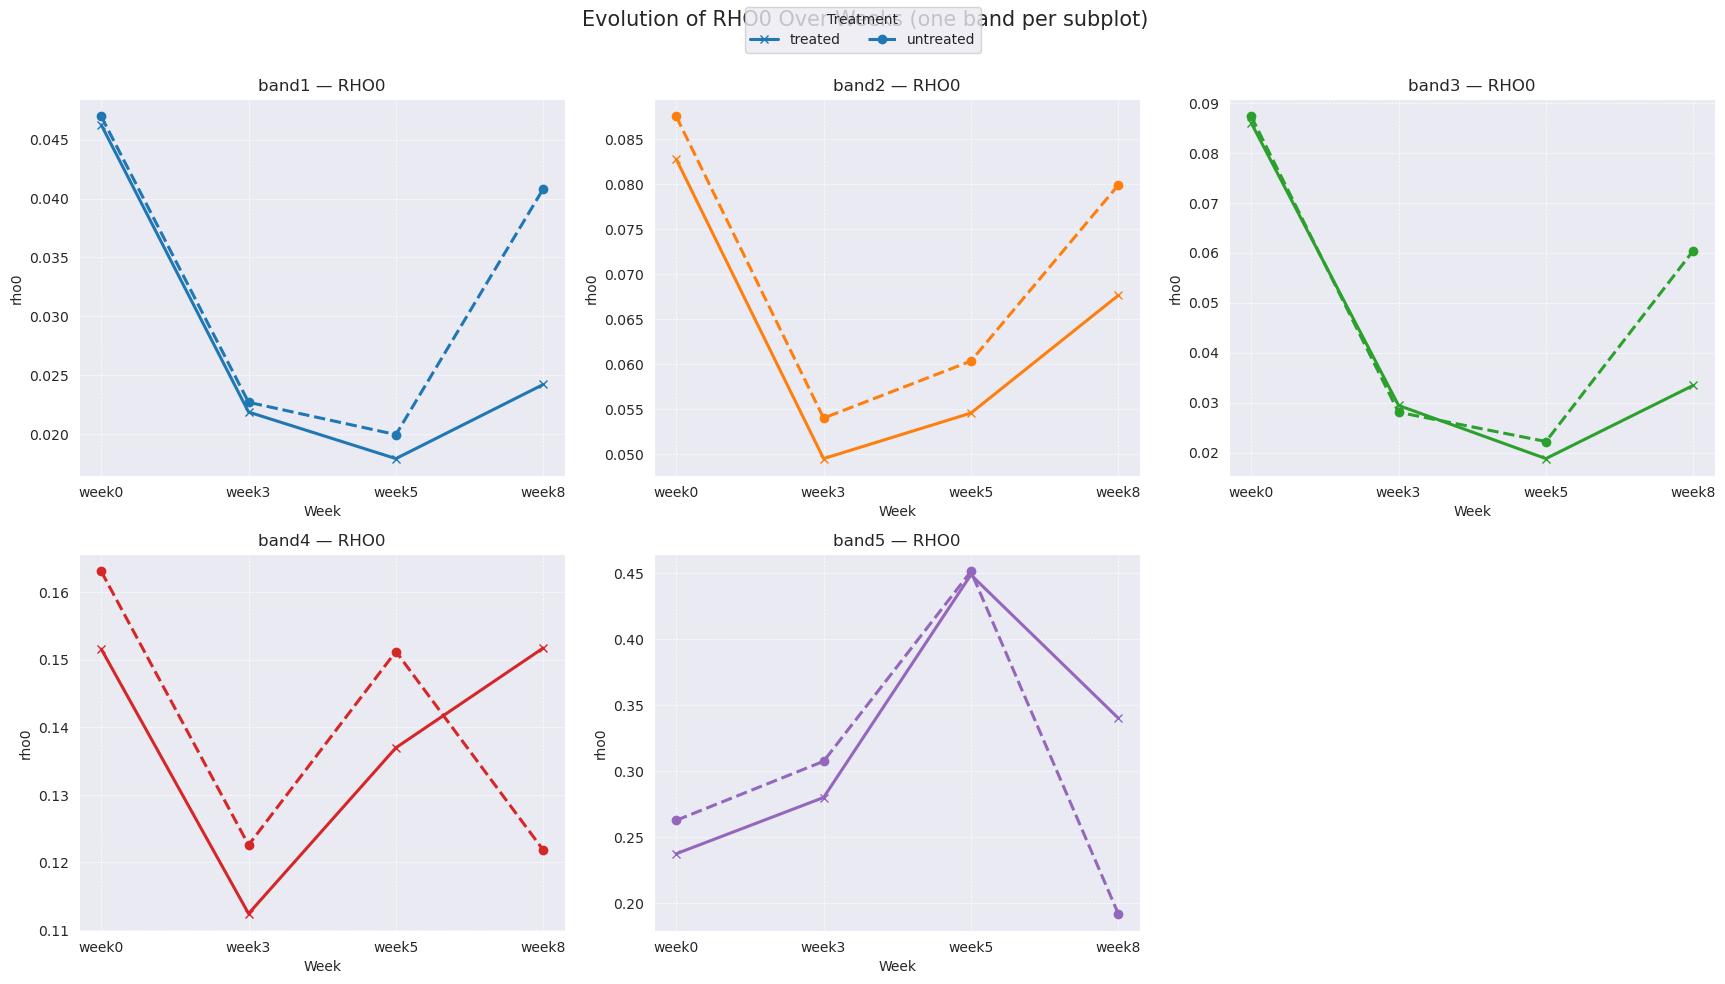

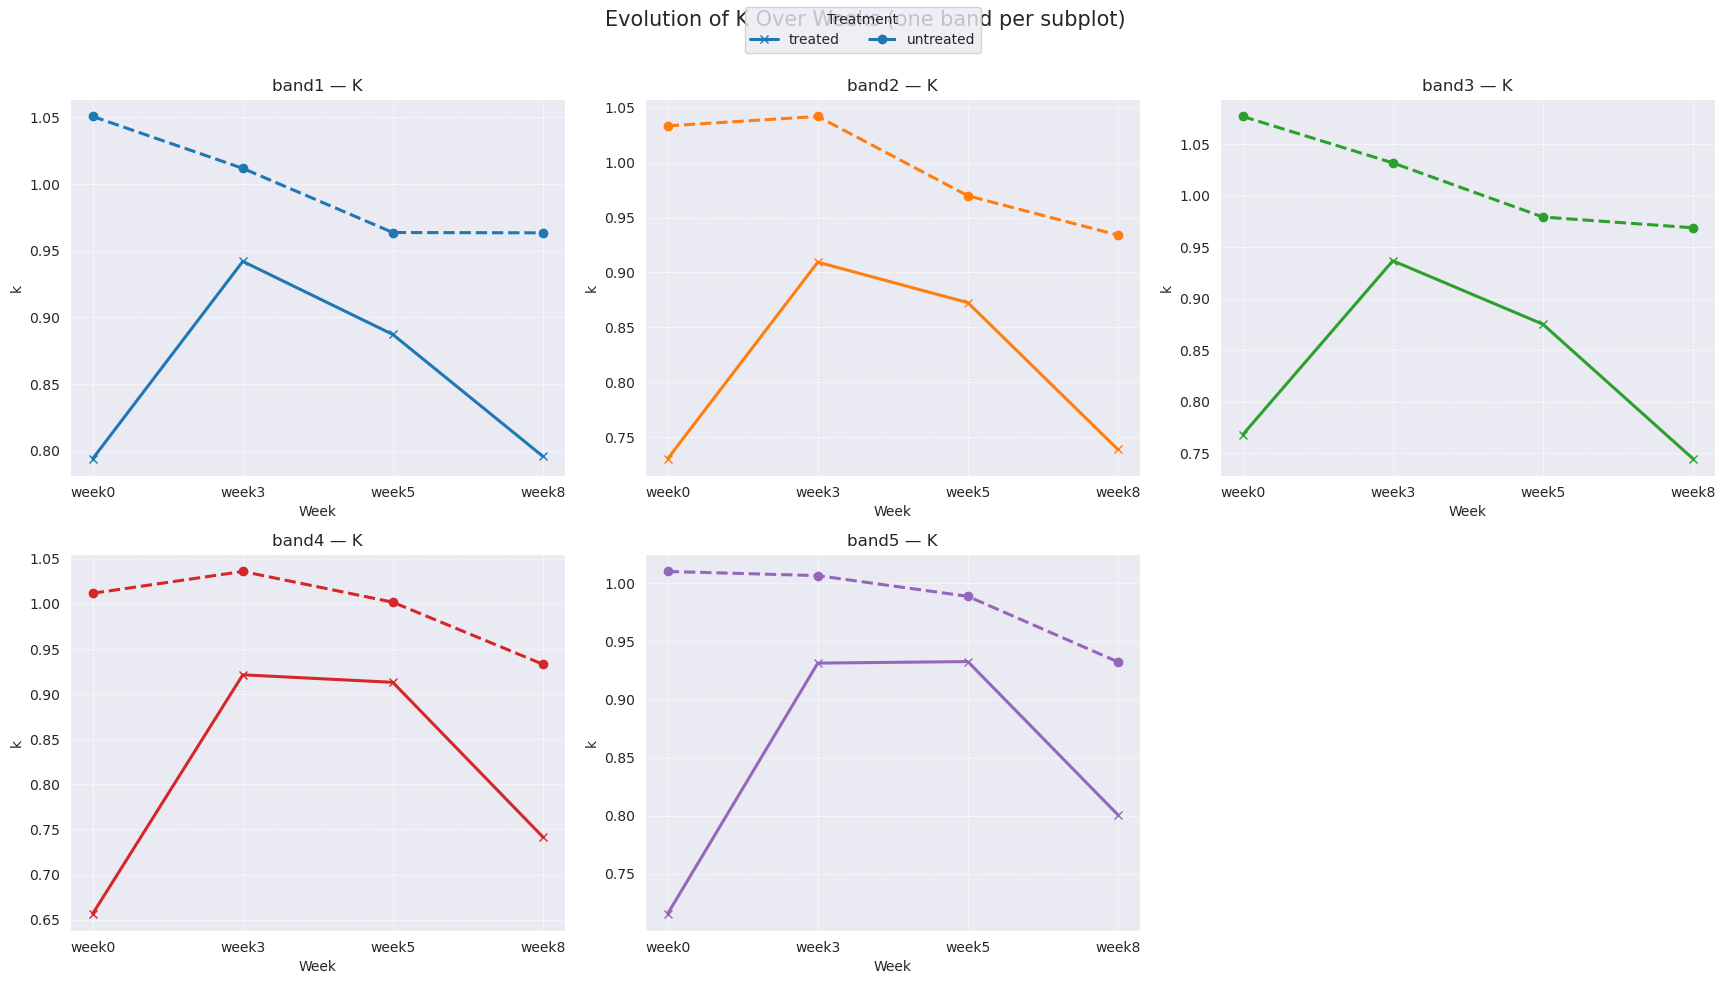

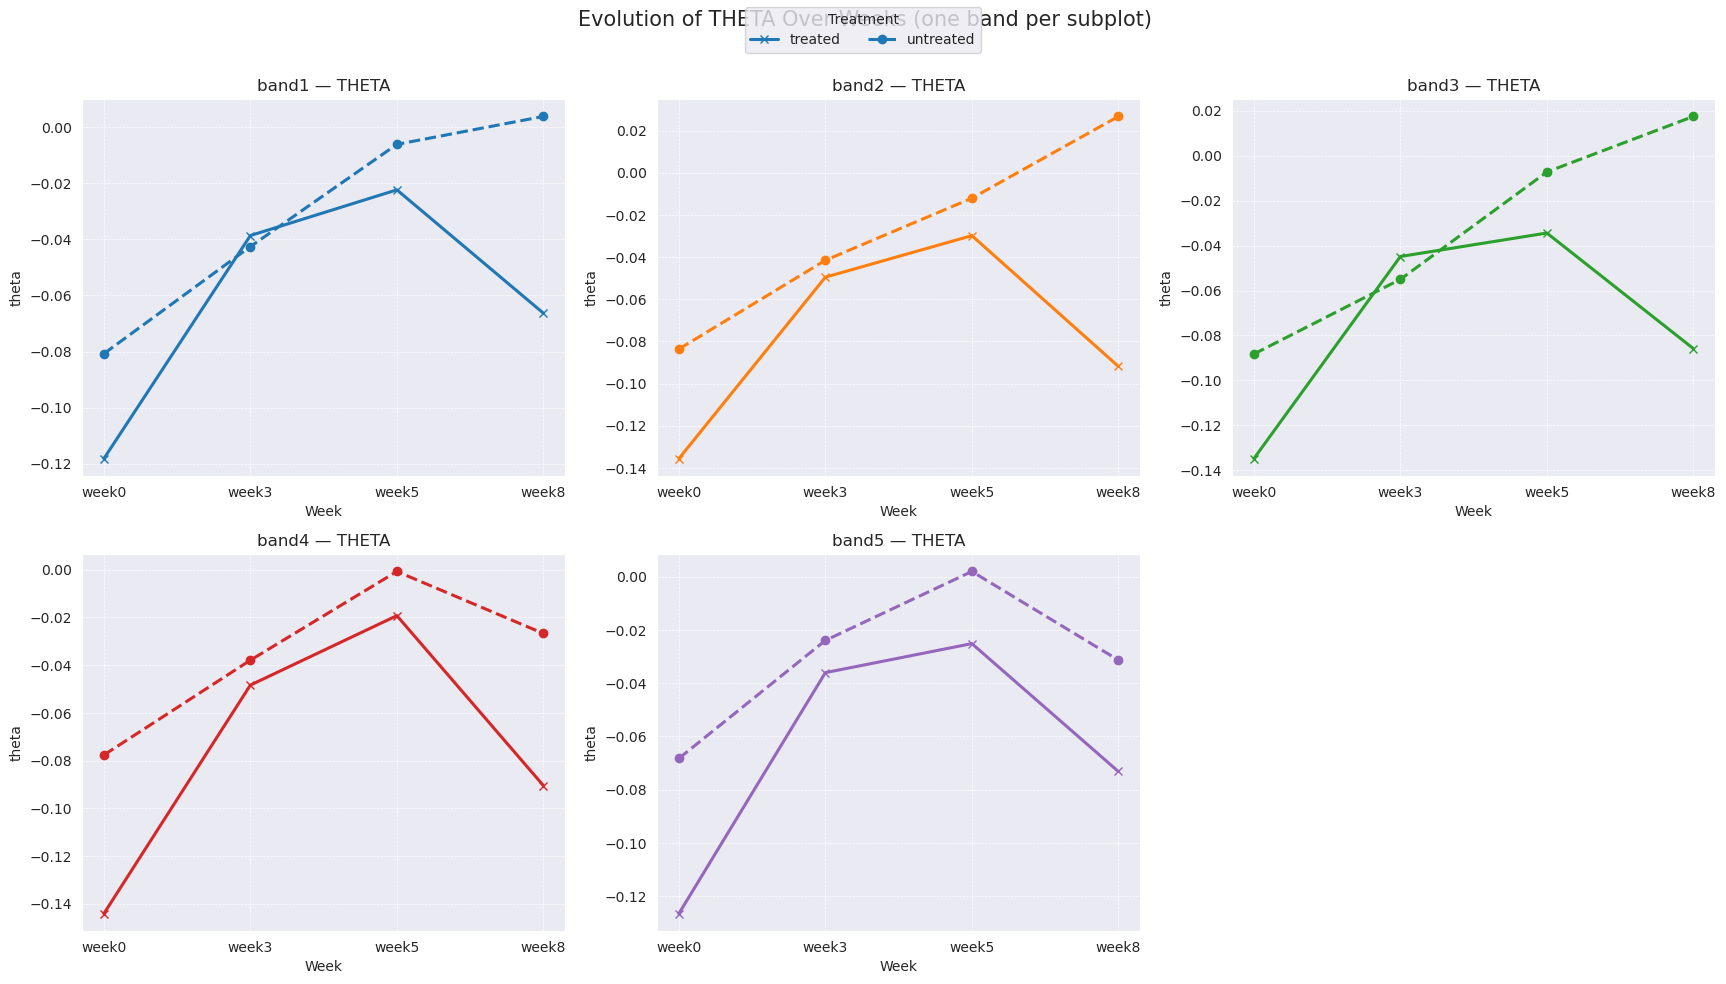

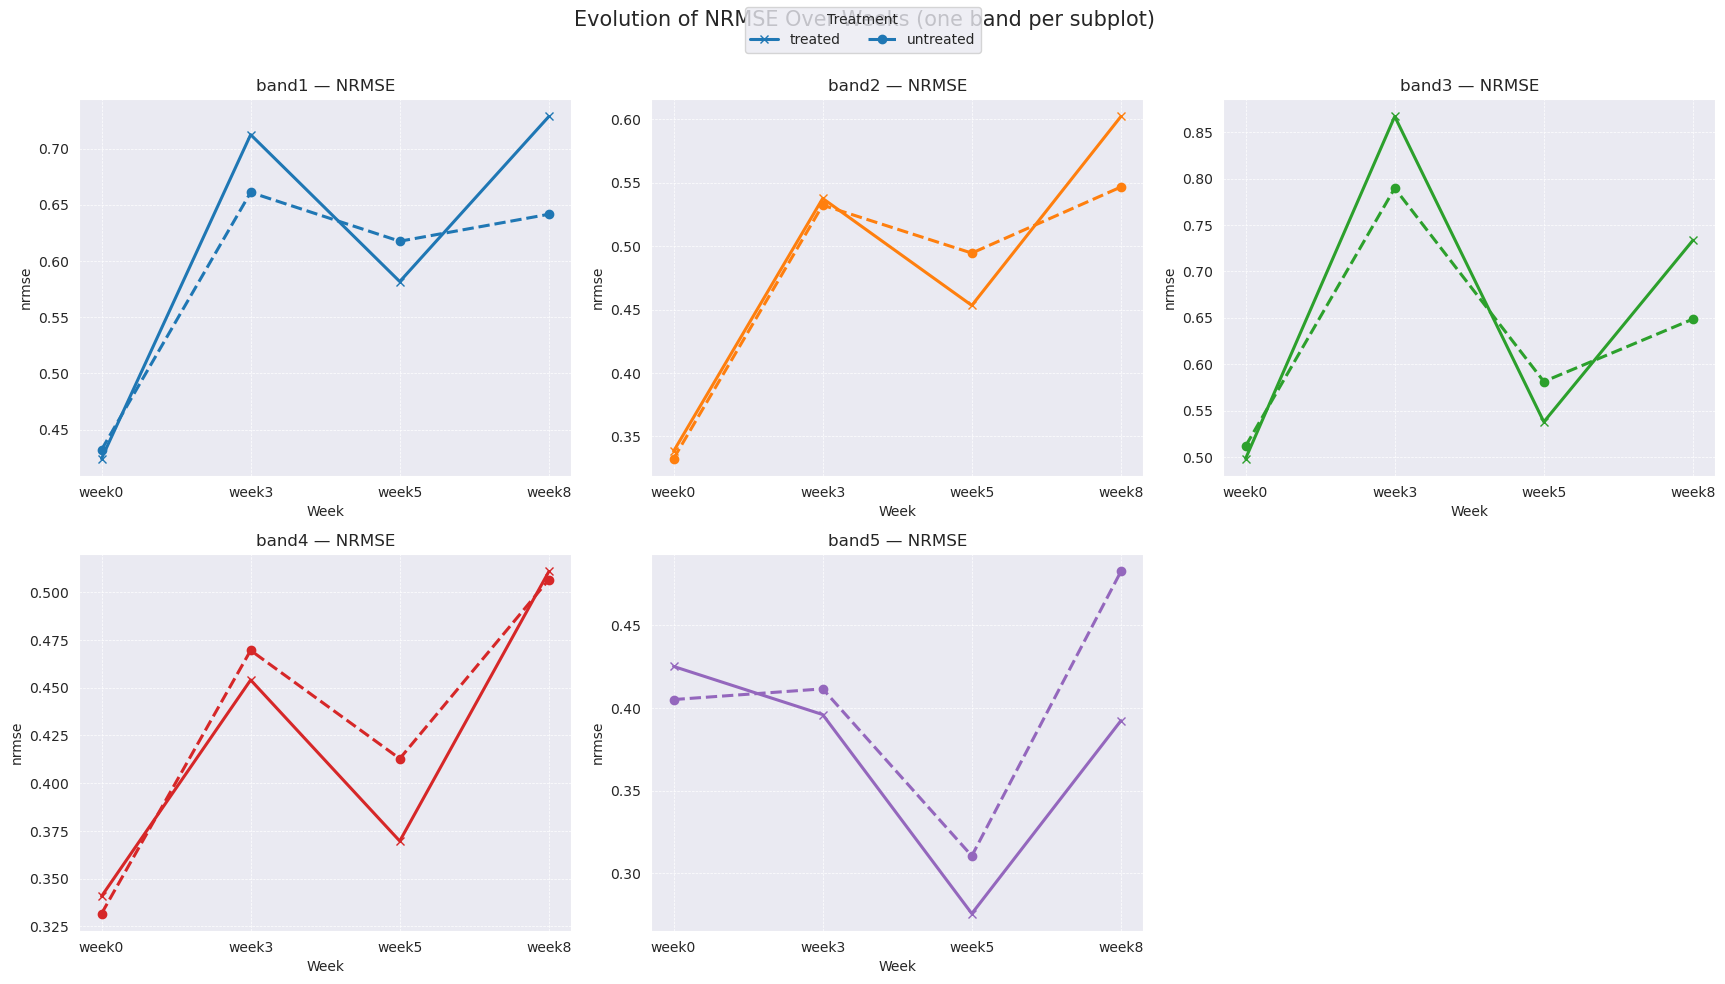

In [5]:
# --- 1. Visualization: Simplified Parameter Evolution Over Weeks (one band per subplot, fixed band colors) ---
print("Generating simplified parameter evolution plots (one band per subplot, fixed band colors)...")

# Bands and colors: one color per band, consistent across treatments
bands = list(grouped_avg['band'].unique())
n_bands = len(bands)
palette = sns.color_palette("tab10", n_bands)
band_colors = {b: palette[i] for i, b in enumerate(bands)}

def best_grid(n, max_cols=3):
    ncols = min(max_cols, n) if n > 0 else 1
    nrows = int(np.ceil(n / ncols))
    return nrows, ncols

# Line/marker styles per treatment (color comes from band_colors)
trt_styles = {
    1: dict(label="treated", linestyle='-', marker='x'),
    0: dict(label="untreated", linestyle='--', marker='o')
}

for param in parameters_to_plot:
    nrows, ncols = best_grid(n_bands, max_cols=3)
    # Bigger figure size
    fig, axes = plt.subplots(nrows, ncols, figsize=(5.8 * ncols, 4.8 * nrows), squeeze=False)
    axes_flat = axes.ravel()

    for i, band in enumerate(bands):
        ax = axes_flat[i]
        color = band_colors[band]

        for trt in [1, 0]:
            df_plot = grouped_avg[(grouped_avg['band'] == band) & (grouped_avg['treatment'] == trt)].copy()
            df_plot = df_plot.sort_values('week')

            ax.plot(
                df_plot['week'].astype(str),
                df_plot[param],
                color=color,
                linewidth=2.2,
                **trt_styles[trt]
            )

        ax.set_title(f"{band} — {param.upper()}", fontsize=12)
        ax.set_xlabel("Week", fontsize=10)
        ax.set_ylabel(f"{param}", fontsize=10)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Hide any unused axes
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].set_visible(False)

    # Shared legend
    handles, labels = axes_flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Treatment", loc="upper center", ncol=2, frameon=True)

    fig.suptitle(f"Evolution of {param.upper()} Over Weeks (one band per subplot)", fontsize=15, y=1.02)
    fig.tight_layout()
    plt.show()

In [25]:
from Common.search import optimized_recursive_search, order_path_list
import re

import geopandas as gpd
import pandas as pd
import polars as pl

from src.Common.config_object import config_object

config = config_object("/home/mak/PycharmProjects/proj_on_uav/src/config_file.yml")

bands = [f"band{i}" for i in range(1, 5 + 1)]

# Search data
folders = ["", "metashape", "products_uav_data", "output", "extract", "polygon_df"]
objective = "plot_"
base_dir =r"/run/media/mak/Heim"
plots_group = optimized_recursive_search(folders, objective, start_dir=base_dir)

# Search geometry plot data
gdf = pd.DataFrame(gpd.read_file(config.main_polygon_path))
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.wkt if geom else None)
gdf = pl.from_pandas(pd.DataFrame(gdf))

weeks_dics = {}
for key, group in plots_group.items():
    ordered_group = order_path_list(group)

    week_id = re.search(r"week\d+", group[0]).group()

    gdf_tmp = gdf
    gdf_tmp = gdf_tmp.with_columns([pl.Series("paths", ordered_group)])
    weeks_dics[week_id] = gdf_tmp


for key, value in weeks_dics.items():
    print(key, value)






2025-08-24 18:56:04,941 [INFO] Configuration loaded successfully from /home/mak/PycharmProjects/proj_on_uav/src/config_file.yml
2025-08-24 18:56:04,942 [INFO] Base path: /run/media/mak/Heim/20240624_week3/metashape/20241206_week3_products_uav_data/
2025-08-24 18:56:04,942 [INFO] Output directory: /run/media/mak/Heim/20240624_week3/metashape/20241206_week3_products_uav_data//output
2025-08-24 18:56:04,943 [INFO] Starting search from /run/media/mak/Heim
2025-08-24 18:56:04,943 [INFO] Looking for files containing 'plot_' in folders related to ['', 'metashape', 'products_uav_data', 'output', 'extract', 'polygon_df']
2025-08-24 18:56:04,948 [INFO] Found 24 files for week5 in /run/media/mak/Heim/20240715_week5/metashape/20241207_week5_products_uav_data/output/extract/polygon_df
2025-08-24 18:56:04,958 [INFO] Found 24 files for week8 in /run/media/mak/Heim/20240826_week8/metashape/20241029_products_uav_data/output/extract/polygon_df
2025-08-24 18:56:04,991 [INFO] Found 24 files for week0 in /

week5 shape: (24, 6)
┌────────┬────────┬────────┬───────┬───────────────────────────────┬───────────────────────────────┐
│ cult   ┆ ifz_id ┆ trt    ┆ ino   ┆ geometry                      ┆ paths                         │
│ ---    ┆ ---    ┆ ---    ┆ ---   ┆ ---                           ┆ ---                           │
│ str    ┆ i32    ┆ str    ┆ bool  ┆ str                           ┆ str                           │
╞════════╪════════╪════════╪═══════╪═══════════════════════════════╪═══════════════════════════════╡
│ aluco  ┆ 90024  ┆ trt    ┆ false ┆ POLYGON ((9.917995180778068   ┆ /run/media/mak/Heim/20240715_ │
│        ┆        ┆        ┆       ┆ 51…                           ┆ w…                            │
│ capone ┆ 90023  ┆ trt    ┆ false ┆ POLYGON ((9.918002012803198   ┆ /run/media/mak/Heim/20240715_ │
│        ┆        ┆        ┆       ┆ 51…                           ┆ w…                            │
│ capone ┆ 90022  ┆ trt    ┆ false ┆ POLYGON ((9.918008844835633   ┆ /

NameError: name 'gdf_gpd' is not defined

{'week0': shape: (24, 3)
 ┌─────────┬─────────────────────────────────┬─────────┐
 │ plot_id ┆ paths                           ┆ n_paths │
 │ ---     ┆ ---                             ┆ ---     │
 │ i64     ┆ list[str]                       ┆ u32     │
 ╞═════════╪═════════════════════════════════╪═════════╡
 │ 0       ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ 1       ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ 2       ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ 3       ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ 4       ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ …       ┆ …                               ┆ …       │
 │ 19      ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ 20      ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ 21      ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ 22      ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 │ 23      ┆ ["/run/media/mak/Heim/20240603… ┆ 1       │
 └─────────┴─────────────────────────────────┴─────────┘,
 'wee


Generating correlation heatmap...


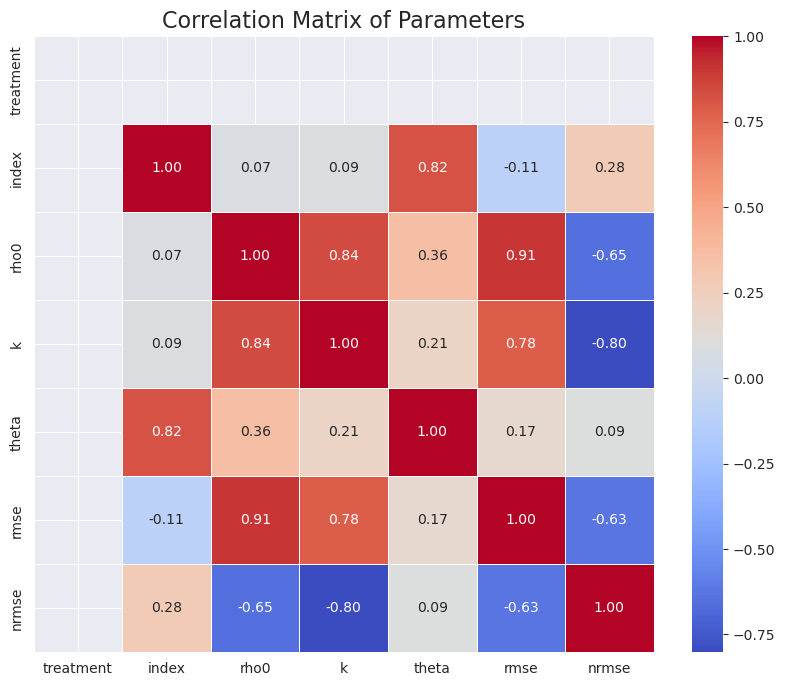

In [16]:
# --- 4. Visualization: Correlation Matrix of Parameters (Unchanged) ---
print("\nGenerating correlation heatmap...")
numeric_cols = grouped_avg.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of Parameters', fontsize=16)
plt.show()